# IFT 6758 - Devoir 2

In [1]:
%load_ext autoreload
%autoreload 2

## Question 1

### a)
Commencez par utiliser les fonctions créées dans `q1.py` pour rendre les données plus informatives et lisibles. Concrètement, remplissez les cellules suivantes :


In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_correlation

sns.set(style="ticks")

In [ ]:
# Charger le fichier `audio_segments.csv` dans un DataFrame `df`
df = pd.read_csv("./data/audio_segments.csv") 
print(df)

            # YTID   start_seconds   end_seconds  \
0      --4gqARaEJE             0.0          10.0   
1      --BfvyPmVMo            20.0          30.0   
2      --U7joUcTCo             0.0          10.0   
3      --i-y1v8Hy8             0.0           9.0   
4      -0BIyqJj9ZU            30.0          40.0   
...            ...             ...           ...   
20366  zyF8TGSRvns           150.0         160.0   
20367  zz35Va7tYmA            30.0          40.0   
20368  zzD_oVgzKMc            30.0          40.0   
20369  zzNdwF40ID8            70.0          80.0   
20370  zzbTaK7CXJY            30.0          40.0   

                               positive_labels  
0        /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk  
1                                     /m/03l9g  
2                                    /m/01b_21  
3      /m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005  
4             /m/07rgt08,/m/07sq110,/t/dd00001  
...                                        ...  
20366   /m/0dwsp,/m/0dwtp,/m/0f8

In [ ]:
# Ajouter une colonne correspondant au nombre d'étiquettes appelée `label_count`
# Ici, il y a un problème ennuyeux avec l'accès à la colonne positive_labels

df['label_count'] = df[' positive_labels'].apply(count_labels)

In [ ]:
# Ajouter une nouvelle colonne appelée `label_names` avec les noms d'étiquette traités au lieu de l'ID d'étiquette
start_time = time.process_time()

df['label_names'] = df[' positive_labels'].apply(convert_ids)

print("Temps écoulé :", time.process_time() - start_time, "seconds")

Temps écoulé : 196.698156 seconds


In [ ]:
# Imprimer le temps pris pour cette opération (soit en utilisant le module time ou timeit).
# Puisque nous n'exécutons ce code qu'une fois, ce n'est pas très problématique que cela prenne quelques minutes.
# Cependant, pour un ensemble de données plus volumineux, cela vaudrait la peine de l'accélérer
# (par exemple en créant un dictionnaire ID -> nom une fois et en l'utilisant).

dic = {}

for i in range(len(df)):
    dic[df[' positive_labels'][i]] = convert_ids(df[' positive_labels'][i])
    
print(dic)

{'/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk': 'Domestic animals, pets|Squeak|Dog|Animal', '/m/03l9g': 'Hammer', '/m/01b_21': 'Cough', '/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005': 'Music|Speech|Female singing|Child singing', '/m/07rgt08,/m/07sq110,/t/dd00001': 'Chuckle, chortle|Belly laugh|Baby laughter', '/m/04rlf,/m/07pbtc8,/m/09x0r': 'Music|Walk, footsteps|Speech', '/m/0140xf,/m/02cjck,/m/04rlf': 'Christmas music|Theme music|Music', '/m/03v3yw,/m/0k4j': 'Keys jangling|Car', '/m/02cjck,/m/04rlf': 'Theme music|Music', '/m/03k3r,/m/04rlf,/m/07q5rw0,/m/09x0r,/m/0jbk': 'Horse|Music|Neigh, whinny|Speech|Animal', '/m/04brg2': 'Dishes, pots, and pans', '/g/122z_qxw,/m/09x0r': 'Firecracker|Speech', '/m/025_jnm,/m/04rlf': 'Finger snapping|Music', '/m/01g90h,/m/04rlf': 'Stomach rumble|Music', '/m/07pzfmf,/m/09x0r': 'Crackle|Speech', '/m/015p6,/m/0chx_,/t/dd00128': 'Bird|White noise|Outside, urban or manmade', '/m/03dnzn,/m/068hy,/m/07p7b8y,/m/07ptzwd,/m/0838f,/m/0jbk,/t/dd00088': 'Bathtub (filling or

In [ ]:
# Affichez le DataFrame et enregistrez-le dans `audio_segments_clean.csv` (sans index)
print(df)
df.to_csv("./data/audio_segments_clean.csv",index=False)
df.to_csv("./audio_segments_clean.csv",index=False)

            # YTID   start_seconds   end_seconds  \
0      --4gqARaEJE             0.0          10.0   
1      --BfvyPmVMo            20.0          30.0   
2      --U7joUcTCo             0.0          10.0   
3      --i-y1v8Hy8             0.0           9.0   
4      -0BIyqJj9ZU            30.0          40.0   
...            ...             ...           ...   
20366  zyF8TGSRvns           150.0         160.0   
20367  zz35Va7tYmA            30.0          40.0   
20368  zzD_oVgzKMc            30.0          40.0   
20369  zzNdwF40ID8            70.0          80.0   
20370  zzbTaK7CXJY            30.0          40.0   

                               positive_labels  label_count  \
0        /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk            4   
1                                     /m/03l9g            1   
2                                    /m/01b_21            1   
3      /m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005            4   
4             /m/07rgt08,/m/07sq110,/t/dd00001            3 

### b)

Ensuite, à l'aide du DataFrame propre, remplissez les cellules suivantes pour mieux comprendre la distribution des étiquettes dans l'ensemble de données. Pour chaque graphique ci-dessous, assurez-vous d'inclure les **noms d'axe** appropriés et un **titre**.

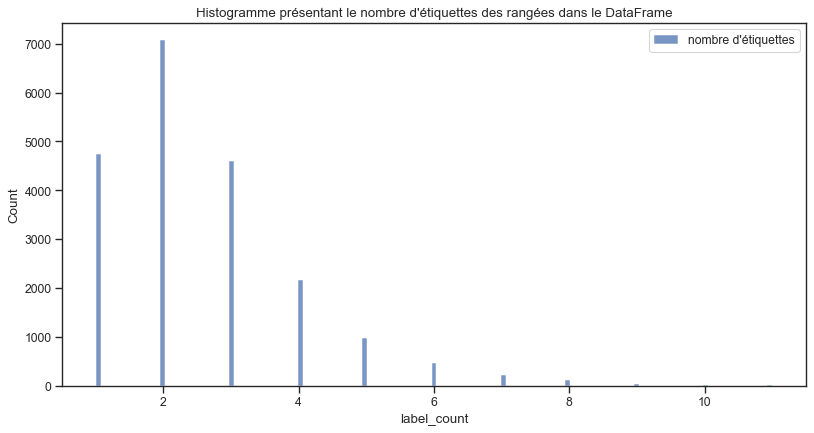

In [ ]:
# À l'aide de seaborn, créez un histogramme du nombre d'étiquettes des rangées dans le DataFrame
plt.figure(figsize=(12, 6), dpi=80)
sns.histplot(data=df, x="label_count", label = 'nombre d\'étiquettes')
plt.title("Histogramme présentant le nombre d'étiquettes des rangées dans le DataFrame")
plt.legend()
plt.show()

Suivez les étapes ci-dessous pour créer un heatmap montrant la "corrélation" entre différentes étiquettes.
- Plus précisément, chaque cellule de la heatmap doit correspondre à la probabilité qu'un échantillon avec l'étiquette de ligne correspondante ait également l'étiquette de colonne correspondante.
- Considérez simplement les étiquettes ["Piano", "Classical music", "Speech", "Conversation", "Screaming"].

Votre graphique final devrait ressembler à ceci :

![alt text](images/heatmap.png "Heatmap")

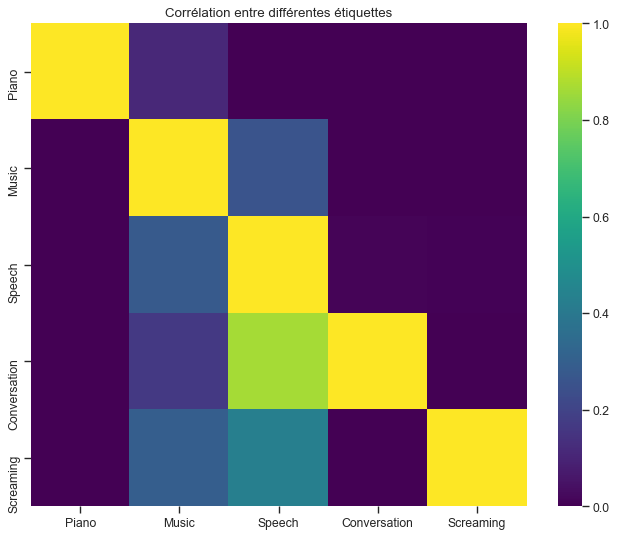

In [ ]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# Il y a plusieurs façons d'aborder cela, la façon que nous recommandons ici est de construire d'abord une grille 2D où chaque
# value est la valeur de corrélation entre la ligne/colonne correspondante à l'aide des fonctions créées dans q1.py.

n_class = len(labels)
conf_grid2D = np.zeros((n_class,n_class))
for i in range(n_class):
    for j in range(n_class):
        conf_grid2D[i,j] += get_correlation(df['label_names'], labels[i], labels[j])
        
# Ensuite, à l'aide de sns.heatmap, créez la heatmap, en profitant de xticklabels et yticklabels pour définir les noms des étiquettes comme valeurs de graduation
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(conf_grid2D, cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.title("Corrélation entre différentes étiquettes")
plt.show()
# TODO

## Question 2
La question 2 n'a pas de composante notebook, remplissez simplement le fichier `q2.py`.

## Question 3

Téléchargez l'audio pour les étiquettes suivantes à l'aide des fonction créées dans `q3.py`

In [ ]:
from q3 import data_pipeline, rename_files, filter_df

In [ ]:
# Téléchargez "Cough"

data_pipeline("./audio_segments_clean.csv", "Cough")

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée

rename_files("Cough_cut", "audio_segments_clean.csv")

  0%|          | 0/60 [00:00<?, ?it/s]

[youtube] --U7joUcTCo: Downloading webpage
[download] Destination: Cough_raw/--U7joUcTCo.mp3
[download] 100% of 114.60KiB in 00:0175KiB/s ETA 00:000
[ffmpeg] Post-process file Cough_raw/--U7joUcTCo.mp3 exists, skipping


  2%|▏         | 1/60 [00:02<02:26,  2.49s/it]

[youtube] 0iiwZ2_9Vi8: Downloading webpage
[download] Destination: Cough_raw/0iiwZ2_9Vi8.mp3
[download] 100% of 1.72MiB in 00:3505KiB/s ETA 00:006
[ffmpeg] Correcting container in "Cough_raw/0iiwZ2_9Vi8.mp3"
[ffmpeg] Post-process file Cough_raw/0iiwZ2_9Vi8.mp3 exists, skipping


  3%|▎         | 2/60 [00:38<21:44, 22.50s/it]

[youtube] 0mZQ6Q-viPw: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
  5%|▌         | 3/60 [00:39<11:56, 12.57s/it]

[youtube] 130v5XJl8G0: Downloading webpage


ERROR: This video has been removed for violating YouTube's Terms of Service
  7%|▋         | 4/60 [00:40<07:19,  7.86s/it]

[youtube] 1Xmw9VUzvLY: Downloading webpage
[download] Destination: Cough_raw/1Xmw9VUzvLY.mp3
[download] 100% of 4.11MiB in 00:5546KiB/s ETA 00:001
[ffmpeg] Correcting container in "Cough_raw/1Xmw9VUzvLY.mp3"
[ffmpeg] Post-process file Cough_raw/1Xmw9VUzvLY.mp3 exists, skipping


  8%|▊         | 5/60 [01:36<23:16, 25.40s/it]

[youtube] 39IZIbmQPzA: Downloading webpage
[download] Destination: Cough_raw/39IZIbmQPzA.mp3
[download] 100% of 2.37MiB in 00:3346KiB/s ETA 00:009
[ffmpeg] Correcting container in "Cough_raw/39IZIbmQPzA.mp3"
[ffmpeg] Post-process file Cough_raw/39IZIbmQPzA.mp3 exists, skipping


 10%|█         | 6/60 [02:11<25:48, 28.68s/it]

[youtube] 3Liy9uBgsQM: Downloading webpage
[download] Destination: Cough_raw/3Liy9uBgsQM.mp3
[download] 100% of 1.59MiB in 00:2985KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/3Liy9uBgsQM.mp3"
[ffmpeg] Post-process file Cough_raw/3Liy9uBgsQM.mp3 exists, skipping


 12%|█▏        | 7/60 [02:42<25:48, 29.22s/it]

[youtube] 3id3zRRZBVM: Downloading webpage
[download] Destination: Cough_raw/3id3zRRZBVM.mp3
[download] 100% of 2.12MiB in 00:2979KiB/s ETA 00:002
[ffmpeg] Correcting container in "Cough_raw/3id3zRRZBVM.mp3"
[ffmpeg] Post-process file Cough_raw/3id3zRRZBVM.mp3 exists, skipping


 13%|█▎        | 8/60 [03:12<25:42, 29.66s/it]

[youtube] 40fIOkLK3j4: Downloading webpage
[download] Destination: Cough_raw/40fIOkLK3j4.mp3
[download] 100% of 2.58MiB in 01:0174KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/40fIOkLK3j4.mp3"
[ffmpeg] Post-process file Cough_raw/40fIOkLK3j4.mp3 exists, skipping


 15%|█▌        | 9/60 [04:16<34:08, 40.16s/it]

[youtube] 5wbc84KnDS0: Downloading webpage


ERROR: This video has been removed for violating YouTube's Terms of Service
 17%|█▋        | 10/60 [04:16<23:13, 27.87s/it]

[youtube] 7lO9BbTaezE: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video
 18%|█▊        | 11/60 [04:16<15:52, 19.43s/it]

[youtube] 9h3a7fN0f-c: Downloading webpage
[youtube] 9h3a7fN0f-c: Refetching age-gated info webpage


ERROR: Sign in to confirm your age
This video may be inappropriate for some users.
 20%|██        | 12/60 [04:17<11:02, 13.80s/it]

[youtube] AIVt3e5EVtc: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video
 22%|██▏       | 13/60 [04:18<07:36,  9.72s/it]

[youtube] AlPu_yxLT2g: Downloading webpage
[download] Destination: Cough_raw/AlPu_yxLT2g.mp3
[download] 100% of 4.98MiB in 01:0919KiB/s ETA 00:001
[ffmpeg] Correcting container in "Cough_raw/AlPu_yxLT2g.mp3"
[ffmpeg] Post-process file Cough_raw/AlPu_yxLT2g.mp3 exists, skipping


 23%|██▎       | 14/60 [05:29<21:43, 28.33s/it]

[youtube] BZU01hhyVKs: Downloading webpage
[download] Destination: Cough_raw/BZU01hhyVKs.mp3
[download] 100% of 19.99MiB in 05:1194KiB/s ETA 00:003
[ffmpeg] Post-process file Cough_raw/BZU01hhyVKs.mp3 exists, skipping


 25%|██▌       | 15/60 [10:43<1:25:53, 114.52s/it]

[youtube] DYTLct-5tVs: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
 27%|██▋       | 16/60 [10:44<58:53, 80.30s/it]   

[youtube] HJg4jZNv1pc: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video
 28%|██▊       | 17/60 [10:44<40:19, 56.26s/it]

[youtube] HMnF8n9c5-Y: Downloading webpage
[download] Destination: Cough_raw/HMnF8n9c5-Y.mp3
[download] 100% of 7.66MiB in 02:2728KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/HMnF8n9c5-Y.mp3"
[ffmpeg] Post-process file Cough_raw/HMnF8n9c5-Y.mp3 exists, skipping


 30%|███       | 18/60 [13:13<58:50, 84.07s/it]

[youtube] IYllzXfvkmY: Downloading webpage
[download] Destination: Cough_raw/IYllzXfvkmY.mp3
[download] 100% of 698.02KiB in 00:1025KiB/s ETA 00:006
[ffmpeg] Post-process file Cough_raw/IYllzXfvkmY.mp3 exists, skipping


 32%|███▏      | 19/60 [13:25<42:36, 62.35s/it]

[youtube] IwQFUAPEk70: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video
 33%|███▎      | 20/60 [13:25<29:08, 43.71s/it]

[youtube] IzPMbIll3LE: Downloading webpage
[download] Destination: Cough_raw/IzPMbIll3LE.mp3
[download] 100% of 1.46MiB in 00:2188KiB/s ETA 00:002
[ffmpeg] Correcting container in "Cough_raw/IzPMbIll3LE.mp3"
[ffmpeg] Post-process file Cough_raw/IzPMbIll3LE.mp3 exists, skipping


 35%|███▌      | 21/60 [13:48<24:17, 37.36s/it]

[youtube] JKUSKYdYo9w: Downloading webpage
[download] Destination: Cough_raw/JKUSKYdYo9w.mp3
[download] 100% of 914.84KiB in 00:1804KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/JKUSKYdYo9w.mp3"
[ffmpeg] Post-process file Cough_raw/JKUSKYdYo9w.mp3 exists, skipping


 37%|███▋      | 22/60 [14:07<20:15, 31.99s/it]

[youtube] JLtieDCSa6Y: Downloading webpage
[youtube] JLtieDCSa6Y: Downloading MPD manifest
[download] Destination: Cough_raw/JLtieDCSa6Y.mp3
[download] 100% of 565.48KiB in 00:0795KiB/s ETA 00:004
[ffmpeg] Correcting container in "Cough_raw/JLtieDCSa6Y.mp3"
[ffmpeg] Post-process file Cough_raw/JLtieDCSa6Y.mp3 exists, skipping


 38%|███▊      | 23/60 [14:16<15:25, 25.02s/it]

[youtube] Kqt4BiLQeeI: Downloading webpage
[download] Destination: Cough_raw/Kqt4BiLQeeI.mp3
[download] 100% of 43.90MiB in 00:1192MiB/s ETA 00:005nown ETA
[ffmpeg] Correcting container in "Cough_raw/Kqt4BiLQeeI.mp3"
[ffmpeg] Post-process file Cough_raw/Kqt4BiLQeeI.mp3 exists, skipping


 40%|████      | 24/60 [14:29<12:56, 21.56s/it]

[youtube] MVLEz28ZdFU: Downloading webpage
[download] Destination: Cough_raw/MVLEz28ZdFU.mp3
[download] 100% of 6.50MiB in 01:2958KiB/s ETA 00:000
[ffmpeg] Correcting container in "Cough_raw/MVLEz28ZdFU.mp3"
[ffmpeg] Post-process file Cough_raw/MVLEz28ZdFU.mp3 exists, skipping


 42%|████▏     | 25/60 [16:00<24:38, 42.23s/it]

[youtube] NjazulpHxNY: Downloading webpage
[download] Destination: Cough_raw/NjazulpHxNY.mp3
[download] 100% of 1.30MiB in 00:1798KiB/s ETA 00:009
[ffmpeg] Correcting container in "Cough_raw/NjazulpHxNY.mp3"
[ffmpeg] Post-process file Cough_raw/NjazulpHxNY.mp3 exists, skipping


 43%|████▎     | 26/60 [16:18<19:52, 35.08s/it]

[youtube] OSlYn9hTRFA: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
 45%|████▌     | 27/60 [16:19<13:36, 24.75s/it]

[youtube] OwAUGABGrqk: Downloading webpage
[download] Destination: Cough_raw/OwAUGABGrqk.mp3
[download] 100% of 4.01MiB in 01:1491KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/OwAUGABGrqk.mp3"
[ffmpeg] Post-process file Cough_raw/OwAUGABGrqk.mp3 exists, skipping


 47%|████▋     | 28/60 [17:35<21:23, 40.10s/it]

[youtube] PyXQVNaAbHc: Downloading webpage
[youtube] PyXQVNaAbHc: Downloading MPD manifest
[download] Destination: Cough_raw/PyXQVNaAbHc.mp3
[download] 100% of 826.74KiB in 00:1487KiB/s ETA 00:007
[ffmpeg] Post-process file Cough_raw/PyXQVNaAbHc.mp3 exists, skipping


 48%|████▊     | 29/60 [17:51<17:00, 32.91s/it]

[youtube] RFeU64gTvGQ: Downloading webpage
[download] Destination: Cough_raw/RFeU64gTvGQ.mp3
[download] 100% of 114.83KiB in 00:0173KiB/s ETA 00:000
[ffmpeg] Post-process file Cough_raw/RFeU64gTvGQ.mp3 exists, skipping


 50%|█████     | 30/60 [17:53<11:52, 23.73s/it]

[youtube] RXJxtAHtkcs: Downloading webpage
[download] Destination: Cough_raw/RXJxtAHtkcs.mp3
[download] 100% of 847.40KiB in 00:1381KiB/s ETA 00:004
[ffmpeg] Correcting container in "Cough_raw/RXJxtAHtkcs.mp3"
[ffmpeg] Post-process file Cough_raw/RXJxtAHtkcs.mp3 exists, skipping


 52%|█████▏    | 31/60 [18:07<10:04, 20.83s/it]

[youtube] Rr84-EZvO0U: Downloading webpage
[download] Destination: Cough_raw/Rr84-EZvO0U.mp3
[download] 100% of 1.83MiB in 00:2552KiB/s ETA 00:004
[ffmpeg] Correcting container in "Cough_raw/Rr84-EZvO0U.mp3"
[ffmpeg] Post-process file Cough_raw/Rr84-EZvO0U.mp3 exists, skipping


 53%|█████▎    | 32/60 [18:34<10:35, 22.69s/it]

[youtube] Rtg1SUrxOPY: Downloading webpage
[youtube] Rtg1SUrxOPY: Downloading MPD manifest
[download] Destination: Cough_raw/Rtg1SUrxOPY.mp3
[download] 100% of 2.29MiB in 00:4655KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/Rtg1SUrxOPY.mp3"
[ffmpeg] Post-process file Cough_raw/Rtg1SUrxOPY.mp3 exists, skipping


 55%|█████▌    | 33/60 [19:23<13:41, 30.43s/it]

[youtube] S3oZrMGDMMw: Downloading webpage
[download] Destination: Cough_raw/S3oZrMGDMMw.mp3
[download] 100% of 2.25MiB in 00:3342KiB/s ETA 00:000
[ffmpeg] Post-process file Cough_raw/S3oZrMGDMMw.mp3 exists, skipping


 57%|█████▋    | 34/60 [19:57<13:39, 31.54s/it]

[youtube] TA-iHSeEUYk: Downloading webpage
[download] Destination: Cough_raw/TA-iHSeEUYk.mp3
[download] 100% of 1.96MiB in 00:3642KiB/s ETA 00:007
[ffmpeg] Correcting container in "Cough_raw/TA-iHSeEUYk.mp3"
[ffmpeg] Post-process file Cough_raw/TA-iHSeEUYk.mp3 exists, skipping


 58%|█████▊    | 35/60 [20:34<13:52, 33.28s/it]

[youtube] TB3VhNczX88: Downloading webpage
[download] Destination: Cough_raw/TB3VhNczX88.mp3
[download] 100% of 969.84KiB in 00:2231KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/TB3VhNczX88.mp3"
[ffmpeg] Post-process file Cough_raw/TB3VhNczX88.mp3 exists, skipping


 60%|██████    | 36/60 [20:58<12:09, 30.39s/it]

[youtube] ThHs0zNnQXg: Downloading webpage


ERROR: This video has been removed for violating YouTube's policy on nudity or sexual content
 62%|██████▏   | 37/60 [20:58<08:11, 21.36s/it]

[youtube] TjP-9AlPShg: Downloading webpage
[download] Destination: Cough_raw/TjP-9AlPShg.mp3
[download] 100% of 1.79MiB in 00:4065KiB/s ETA 00:00
[ffmpeg] Post-process file Cough_raw/TjP-9AlPShg.mp3 exists, skipping


 63%|██████▎   | 38/60 [21:40<10:03, 27.42s/it]

[youtube] X8yUSV4oqoU: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
 65%|██████▌   | 39/60 [21:41<06:48, 19.45s/it]

[youtube] YsUCzO0gfro: Downloading webpage
[download] Destination: Cough_raw/YsUCzO0gfro.mp3
[download] 100% of 2.04MiB in 00:3798KiB/s ETA 00:00
[ffmpeg] Post-process file Cough_raw/YsUCzO0gfro.mp3 exists, skipping


 67%|██████▋   | 40/60 [22:19<08:22, 25.15s/it]

[youtube] _-_5kbw2Mcw: Downloading webpage
[download] Destination: Cough_raw/_-_5kbw2Mcw.mp3
[download] 100% of 1.49MiB in 00:3483KiB/s ETA 00:007
[ffmpeg] Post-process file Cough_raw/_-_5kbw2Mcw.mp3 exists, skipping


 68%|██████▊   | 41/60 [22:54<08:54, 28.11s/it]

[youtube] _prGJ06oCXk: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.
 70%|███████   | 42/60 [22:54<05:55, 19.75s/it]

[youtube] aFfXpjfI2nk: Downloading webpage


ERROR: This video has been removed for violating YouTube's Terms of Service
 72%|███████▏  | 43/60 [22:55<03:56, 13.90s/it]

[youtube] fIer0uCLqSM: Downloading webpage
[youtube] fIer0uCLqSM: Downloading MPD manifest
[download] Destination: Cough_raw/fIer0uCLqSM.mp3
[download] 100% of 511.25KiB in 00:0772KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/fIer0uCLqSM.mp3"
[ffmpeg] Post-process file Cough_raw/fIer0uCLqSM.mp3 exists, skipping


 73%|███████▎  | 44/60 [23:04<03:18, 12.40s/it]

[youtube] hQMkT2YEnNA: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.
 75%|███████▌  | 45/60 [23:04<02:11,  8.78s/it]

[youtube] iUtE4nRvBsM: Downloading webpage
[download] Destination: Cough_raw/iUtE4nRvBsM.mp3
[download] 100% of 1.99MiB in 00:2796KiB/s ETA 00:005
[ffmpeg] Correcting container in "Cough_raw/iUtE4nRvBsM.mp3"
[ffmpeg] Post-process file Cough_raw/iUtE4nRvBsM.mp3 exists, skipping


 77%|███████▋  | 46/60 [23:32<03:24, 14.61s/it]

[youtube] j6gaw7Nasnc: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video
 78%|███████▊  | 47/60 [23:32<02:13, 10.30s/it]

[youtube] kL_-XdzJQ3g: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.
 80%|████████  | 48/60 [23:33<01:27,  7.30s/it]

[youtube] kOheqjodDmw: Downloading webpage
[download] Destination: Cough_raw/kOheqjodDmw.mp3
[download] 100% of 3.74MiB in 01:2973KiB/s ETA 00:00
[ffmpeg] Post-process file Cough_raw/kOheqjodDmw.mp3 exists, skipping


 82%|████████▏ | 49/60 [25:04<05:57, 32.54s/it]

[youtube] khC7ed0_Kvs: Downloading webpage


ERROR: Video unavailable
 83%|████████▎ | 50/60 [25:04<03:48, 22.85s/it]

[youtube] lH6ym1UrlnE: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
 85%|████████▌ | 51/60 [25:05<02:25, 16.19s/it]

[youtube] mQITX62D_3s: Downloading webpage


ERROR: Video unavailable
 87%|████████▋ | 52/60 [25:05<01:31, 11.41s/it]

[youtube] nBuw_KZXT_k: Downloading webpage
[download] Destination: Cough_raw/nBuw_KZXT_k.mp3
[download] 100% of 349.18KiB in 00:0618KiB/s ETA 00:00
[ffmpeg] Correcting container in "Cough_raw/nBuw_KZXT_k.mp3"
[ffmpeg] Post-process file Cough_raw/nBuw_KZXT_k.mp3 exists, skipping


 88%|████████▊ | 53/60 [25:13<01:11, 10.24s/it]

[youtube] nK04u0NuenA: Downloading webpage


ERROR: This video has been removed for violating YouTube's Community Guidelines
 90%|█████████ | 54/60 [25:13<00:43,  7.25s/it]

[youtube] pzsV0Sr5hrE: Downloading webpage
[youtube] pzsV0Sr5hrE: Downloading MPD manifest
[download] Destination: Cough_raw/pzsV0Sr5hrE.mp3
[download] 100% of 382.56KiB in 00:0804KiB/s ETA 00:00
[ffmpeg] Post-process file Cough_raw/pzsV0Sr5hrE.mp3 exists, skipping


 92%|█████████▏| 55/60 [25:23<00:40,  8.08s/it]

[youtube] vIBtwK5mH5Q: Downloading webpage


ERROR: This video has been removed for violating YouTube's Community Guidelines
 93%|█████████▎| 56/60 [25:23<00:22,  5.73s/it]

[youtube] w4enmhllLkQ: Downloading webpage


ERROR: This video has been removed for violating YouTube's Terms of Service
 95%|█████████▌| 57/60 [25:24<00:12,  4.09s/it]

[youtube] wU1xLUAWAyA: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.
 97%|█████████▋| 58/60 [25:24<00:05,  2.95s/it]

[youtube] wuvn-vp5InE: Downloading webpage
[download] Destination: Cough_raw/wuvn-vp5InE.mp3
[download] 100% of 168.17KiB in 00:0314KiB/s ETA 00:001
[ffmpeg] Correcting container in "Cough_raw/wuvn-vp5InE.mp3"
[ffmpeg] Post-process file Cough_raw/wuvn-vp5InE.mp3 exists, skipping


 98%|█████████▊| 59/60 [25:28<00:03,  3.27s/it]

[youtube] yMNs4gCJn1c: Downloading webpage
[download] Destination: Cough_raw/yMNs4gCJn1c.mp3
[download] 100% of 558.09KiB in 00:0915KiB/s ETA 00:004
[ffmpeg] Correcting container in "Cough_raw/yMNs4gCJn1c.mp3"
[ffmpeg] Post-process file Cough_raw/yMNs4gCJn1c.mp3 exists, skipping


100%|██████████| 60/60 [25:39<00:00, 25.66s/it]


In [ ]:
# Téléchargez "Hammer"

data_pipeline("./audio_segments_clean.csv", "Hammer")

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée

rename_files("Hammer_cut", "audio_segments_clean.csv")

  0%|          | 0/60 [00:00<?, ?it/s]

[youtube] --BfvyPmVMo: Downloading webpage
[download] Destination: Hammer_raw/--BfvyPmVMo.mp3
[download] 100% of 2.29MiB in 00:4168KiB/s ETA 00:002
[ffmpeg] Correcting container in "Hammer_raw/--BfvyPmVMo.mp3"
[ffmpeg] Post-process file Hammer_raw/--BfvyPmVMo.mp3 exists, skipping


  2%|▏         | 1/60 [00:42<41:40, 42.38s/it]

[youtube] 03aJ_RcnBko: Downloading webpage
[download] Destination: Hammer_raw/03aJ_RcnBko.mp3
[download] 100% of 15.57MiB in 04:0979KiB/s ETA 00:003
[ffmpeg] Correcting container in "Hammer_raw/03aJ_RcnBko.mp3"
[ffmpeg] Post-process file Hammer_raw/03aJ_RcnBko.mp3 exists, skipping


  3%|▎         | 2/60 [04:53<2:39:35, 165.09s/it]

[youtube] 07AQUF6A_mg: Downloading webpage
[download] Destination: Hammer_raw/07AQUF6A_mg.mp3
[download] 100% of 5.61MiB in 01:2705KiB/s ETA 00:000
[ffmpeg] Correcting container in "Hammer_raw/07AQUF6A_mg.mp3"
[ffmpeg] Post-process file Hammer_raw/07AQUF6A_mg.mp3 exists, skipping


  5%|▌         | 3/60 [06:21<2:03:33, 130.06s/it]

[youtube] 0GNNFBrRz1E: Downloading webpage
[download] Destination: Hammer_raw/0GNNFBrRz1E.mp3
[download] 100% of 7.24MiB in 01:4099KiB/s ETA 00:005
[ffmpeg] Correcting container in "Hammer_raw/0GNNFBrRz1E.mp3"
[ffmpeg] Post-process file Hammer_raw/0GNNFBrRz1E.mp3 exists, skipping


  7%|▋         | 4/60 [08:03<1:50:52, 118.79s/it]

[youtube] 0fsntL6RKww: Downloading webpage
[download] Destination: Hammer_raw/0fsntL6RKww.mp3
[download] 100% of 3.07MiB in 00:4764KiB/s ETA 00:00
[ffmpeg] Post-process file Hammer_raw/0fsntL6RKww.mp3 exists, skipping


  8%|▊         | 5/60 [08:52<1:25:51, 93.67s/it] 

[youtube] 19knOj43yZE: Downloading webpage
[download] Destination: Hammer_raw/19knOj43yZE.mp3
[download] 100% of 23.24MiB in 07:1812KiB/s ETA 00:00:16
[ffmpeg] Correcting container in "Hammer_raw/19knOj43yZE.mp3"
[ffmpeg] Post-process file Hammer_raw/19knOj43yZE.mp3 exists, skipping


 10%|█         | 6/60 [16:12<3:10:21, 211.51s/it]

[youtube] 1wdCX1HmRyk: Downloading webpage
[download] Destination: Hammer_raw/1wdCX1HmRyk.mp3
[download] 100% of 4.93MiB in 01:1250KiB/s ETA 00:004
[ffmpeg] Correcting container in "Hammer_raw/1wdCX1HmRyk.mp3"
[ffmpeg] Post-process file Hammer_raw/1wdCX1HmRyk.mp3 exists, skipping


 12%|█▏        | 7/60 [17:27<2:27:14, 166.69s/it]

[youtube] 2pYtX-Stpys: Downloading webpage
[youtube] 2pYtX-Stpys: Downloading MPD manifest
[download] Destination: Hammer_raw/2pYtX-Stpys.mp3
[download] 100% of 1.39MiB in 00:2558KiB/s ETA 00:002
[ffmpeg] Correcting container in "Hammer_raw/2pYtX-Stpys.mp3"
[ffmpeg] Post-process file Hammer_raw/2pYtX-Stpys.mp3 exists, skipping


 13%|█▎        | 8/60 [17:54<1:45:58, 122.27s/it]

[youtube] 3CnwUQZ6q78: Downloading webpage
[download] Destination: Hammer_raw/3CnwUQZ6q78.mp3
[download] 100% of 7.41MiB in 01:5422KiB/s ETA 00:005
[ffmpeg] Correcting container in "Hammer_raw/3CnwUQZ6q78.mp3"
[ffmpeg] Post-process file Hammer_raw/3CnwUQZ6q78.mp3 exists, skipping


 15%|█▌        | 9/60 [19:50<1:42:16, 120.32s/it]

[youtube] 402OOck5CAk: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
 17%|█▋        | 10/60 [19:51<1:09:34, 83.48s/it]

[youtube] 4mHLCOzd2No: Downloading webpage
[download] Destination: Hammer_raw/4mHLCOzd2No.mp3
[download] 100% of 4.65MiB in 01:4185KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/4mHLCOzd2No.mp3"
[ffmpeg] Post-process file Hammer_raw/4mHLCOzd2No.mp3 exists, skipping


 18%|█▊        | 11/60 [21:34<1:13:12, 89.64s/it]

[youtube] 5etqUVLDcE4: Downloading webpage
[download] Destination: Hammer_raw/5etqUVLDcE4.mp3
[download] 100% of 2.46MiB in 00:4797KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/5etqUVLDcE4.mp3"
[ffmpeg] Post-process file Hammer_raw/5etqUVLDcE4.mp3 exists, skipping


 20%|██        | 12/60 [22:23<1:01:48, 77.26s/it]

[youtube] 5tyZiD0-8z4: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
 22%|██▏       | 13/60 [22:24<42:21, 54.08s/it]  

[youtube] 660s2w9DSgc: Downloading webpage
[download] Destination: Hammer_raw/660s2w9DSgc.mp3
[download] 100% of 4.83MiB in 01:1385KiB/s ETA 00:002
[ffmpeg] Correcting container in "Hammer_raw/660s2w9DSgc.mp3"
[ffmpeg] Post-process file Hammer_raw/660s2w9DSgc.mp3 exists, skipping


 23%|██▎       | 14/60 [23:39<46:11, 60.24s/it]

[youtube] 6GLRCkbptwQ: Downloading webpage
[download] Destination: Hammer_raw/6GLRCkbptwQ.mp3
[download] 100% of 1.08MiB in 00:1697KiB/s ETA 00:009
[ffmpeg] Post-process file Hammer_raw/6GLRCkbptwQ.mp3 exists, skipping


 25%|██▌       | 15/60 [23:57<35:42, 47.62s/it]

[youtube] 6gchJ1prCFM: Downloading webpage
[download] Destination: Hammer_raw/6gchJ1prCFM.mp3
[download] 100% of 4.65MiB in 01:5010KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/6gchJ1prCFM.mp3"
[ffmpeg] Post-process file Hammer_raw/6gchJ1prCFM.mp3 exists, skipping


 27%|██▋       | 16/60 [25:49<49:08, 67.02s/it]

[youtube] AAySJVt6bys: Downloading webpage
[download] Destination: Hammer_raw/AAySJVt6bys.mp3
[download] 100% of 5.45MiB in 01:5192KiB/s ETA 00:003
[ffmpeg] Correcting container in "Hammer_raw/AAySJVt6bys.mp3"
[ffmpeg] Post-process file Hammer_raw/AAySJVt6bys.mp3 exists, skipping


 28%|██▊       | 17/60 [27:42<57:54, 80.80s/it]

[youtube] BDznJMSoAoQ: Downloading webpage
[download] Destination: Hammer_raw/BDznJMSoAoQ.mp3
[download] 100% of 832.31KiB in 00:1670KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/BDznJMSoAoQ.mp3"
[ffmpeg] Post-process file Hammer_raw/BDznJMSoAoQ.mp3 exists, skipping


 30%|███       | 18/60 [27:59<43:13, 61.75s/it]

[youtube] BPeLfS4NPEI: Downloading webpage
[download] Destination: Hammer_raw/BPeLfS4NPEI.mp3
[download] 100% of 9.92MiB in 03:0349KiB/s ETA 00:007
[ffmpeg] Post-process file Hammer_raw/BPeLfS4NPEI.mp3 exists, skipping


 32%|███▏      | 19/60 [31:03<1:07:20, 98.55s/it]

[youtube] D5_NHUuDjtY: Downloading webpage
[download] Destination: Hammer_raw/D5_NHUuDjtY.mp3
[download] 100% of 8.35MiB in 02:3444KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/D5_NHUuDjtY.mp3"
[ffmpeg] Post-process file Hammer_raw/D5_NHUuDjtY.mp3 exists, skipping


 33%|███▎      | 20/60 [33:39<1:17:07, 115.68s/it]

[youtube] DHkK8sw3dd0: Downloading webpage
[download] Destination: Hammer_raw/DHkK8sw3dd0.mp3
[download] 100% of 2.06MiB in 00:3142KiB/s ETA 00:008
[ffmpeg] Correcting container in "Hammer_raw/DHkK8sw3dd0.mp3"
[ffmpeg] Post-process file Hammer_raw/DHkK8sw3dd0.mp3 exists, skipping


 35%|███▌      | 21/60 [34:13<59:08, 90.99s/it]   

[youtube] EEJsJg_h24c: Downloading webpage
[download] Destination: Hammer_raw/EEJsJg_h24c.mp3
[download] 100% of 5.70MiB in 01:2998KiB/s ETA 00:008
[ffmpeg] Post-process file Hammer_raw/EEJsJg_h24c.mp3 exists, skipping


 37%|███▋      | 22/60 [35:44<57:38, 91.02s/it]

[youtube] FEb3dSXbur8: Downloading webpage
[download] Destination: Hammer_raw/FEb3dSXbur8.mp3
[download] 100% of 1.27MiB in 00:2998KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/FEb3dSXbur8.mp3"
[ffmpeg] Post-process file Hammer_raw/FEb3dSXbur8.mp3 exists, skipping


 38%|███▊      | 23/60 [36:14<45:00, 72.97s/it]

[youtube] FQkei7opfBE: Downloading webpage
[download] Destination: Hammer_raw/FQkei7opfBE.mp3
[download] 100% of 37.31MiB in 11:5740KiB/s ETA 00:00:51
[ffmpeg] Correcting container in "Hammer_raw/FQkei7opfBE.mp3"
[ffmpeg] Post-process file Hammer_raw/FQkei7opfBE.mp3 exists, skipping


 40%|████      | 24/60 [48:14<2:40:13, 267.04s/it]

[youtube] FTzobxYogqM: Downloading webpage
[download] Destination: Hammer_raw/FTzobxYogqM.mp3
[download] 100% of 13.81MiB in 00:0371MiB/s ETA 00:00known ETA
[ffmpeg] Correcting container in "Hammer_raw/FTzobxYogqM.mp3"
[ffmpeg] Post-process file Hammer_raw/FTzobxYogqM.mp3 exists, skipping


 42%|████▏     | 25/60 [48:20<1:49:59, 188.55s/it]

[youtube] GP3kWUxoZIs: Downloading webpage
[download] Destination: Hammer_raw/GP3kWUxoZIs.mp3
[download] 100% of 2.76MiB in 00:3527KiB/s ETA 00:000
[ffmpeg] Correcting container in "Hammer_raw/GP3kWUxoZIs.mp3"
[ffmpeg] Post-process file Hammer_raw/GP3kWUxoZIs.mp3 exists, skipping


 43%|████▎     | 26/60 [48:57<1:21:04, 143.09s/it]

[youtube] GcI6Q7SPIwg: Downloading webpage
[download] Destination: Hammer_raw/GcI6Q7SPIwg.mp3
[download] 100% of 1.24MiB in 00:1854KiB/s ETA 00:001
[ffmpeg] Correcting container in "Hammer_raw/GcI6Q7SPIwg.mp3"
[ffmpeg] Post-process file Hammer_raw/GcI6Q7SPIwg.mp3 exists, skipping


 45%|████▌     | 27/60 [49:17<58:26, 106.25s/it]  

[youtube] GopiNqMWpzA: Downloading webpage
[download] Destination: Hammer_raw/GopiNqMWpzA.mp3
[download] 100% of 3.91MiB in 00:5204KiB/s ETA 00:000
[ffmpeg] Correcting container in "Hammer_raw/GopiNqMWpzA.mp3"
[ffmpeg] Post-process file Hammer_raw/GopiNqMWpzA.mp3 exists, skipping


 47%|████▋     | 28/60 [50:11<48:18, 90.57s/it] 

[youtube] IV3DTr7cP94: Downloading webpage
[download] Destination: Hammer_raw/IV3DTr7cP94.mp3
[download] 100% of 1.05MiB in 00:1303KiB/s ETA 00:008
[ffmpeg] Post-process file Hammer_raw/IV3DTr7cP94.mp3 exists, skipping


 48%|████▊     | 29/60 [50:26<35:03, 67.86s/it]

[youtube] IcmAVLJQAXs: Downloading webpage
[download] Destination: Hammer_raw/IcmAVLJQAXs.mp3
[download] 100% of 2.75MiB in 00:4366KiB/s ETA 00:005
[ffmpeg] Correcting container in "Hammer_raw/IcmAVLJQAXs.mp3"
[ffmpeg] Post-process file Hammer_raw/IcmAVLJQAXs.mp3 exists, skipping


 50%|█████     | 30/60 [51:11<30:30, 61.01s/it]

[youtube] Ik7GbPEqljg: Downloading webpage
[download] Destination: Hammer_raw/Ik7GbPEqljg.mp3
[download] 100% of 12.69MiB in 03:5308KiB/s ETA 00:003
[ffmpeg] Correcting container in "Hammer_raw/Ik7GbPEqljg.mp3"
[ffmpeg] Post-process file Hammer_raw/Ik7GbPEqljg.mp3 exists, skipping


 52%|█████▏    | 31/60 [55:06<54:39, 113.10s/it]

[youtube] JaC-ZJFQVgY: Downloading webpage
[download] Destination: Hammer_raw/JaC-ZJFQVgY.mp3
[download] 100% of 11.28MiB in 03:2550KiB/s ETA 00:002
[ffmpeg] Post-process file Hammer_raw/JaC-ZJFQVgY.mp3 exists, skipping


 53%|█████▎    | 32/60 [58:32<1:05:52, 141.17s/it]

[youtube] KhO4QQ6GyUs: Downloading webpage
[download] Destination: Hammer_raw/KhO4QQ6GyUs.mp3
[download] 100% of 1.47MiB in 00:2242KiB/s ETA 00:003
[ffmpeg] Correcting container in "Hammer_raw/KhO4QQ6GyUs.mp3"
[ffmpeg] Post-process file Hammer_raw/KhO4QQ6GyUs.mp3 exists, skipping


 55%|█████▌    | 33/60 [58:56<47:40, 105.95s/it]  

[youtube] OedIGvcGKLo: Downloading webpage
[download] Destination: Hammer_raw/OedIGvcGKLo.mp3
[download] 100% of 15.81MiB in 04:4980KiB/s ETA 00:000
[ffmpeg] Post-process file Hammer_raw/OedIGvcGKLo.mp3 exists, skipping


 57%|█████▋    | 34/60 [1:03:49<1:10:10, 161.94s/it]

[youtube] OfefVMM5L44: Downloading webpage
[download] Destination: Hammer_raw/OfefVMM5L44.mp3
[download] 100% of 6.08MiB in 01:4473KiB/s ETA 00:001
[ffmpeg] Post-process file Hammer_raw/OfefVMM5L44.mp3 exists, skipping


 58%|█████▊    | 35/60 [1:05:35<1:00:30, 145.22s/it]

[youtube] RsK6fw4_vR4: Downloading webpage
[download] Destination: Hammer_raw/RsK6fw4_vR4.mp3
[download] 100% of 2.81MiB in 00:5111KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/RsK6fw4_vR4.mp3"
[ffmpeg] Post-process file Hammer_raw/RsK6fw4_vR4.mp3 exists, skipping


 60%|██████    | 36/60 [1:06:27<46:58, 117.45s/it]  

[youtube] ShcyfLSHa1Y: Downloading webpage
[download] Destination: Hammer_raw/ShcyfLSHa1Y.mp3
[download] 100% of 9.12MiB in 02:5761KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/ShcyfLSHa1Y.mp3"
[ffmpeg] Post-process file Hammer_raw/ShcyfLSHa1Y.mp3 exists, skipping


 62%|██████▏   | 37/60 [1:09:26<52:06, 135.92s/it]

[youtube] Tt68Ymedc6k: Downloading webpage
[download] Destination: Hammer_raw/Tt68Ymedc6k.mp3
[download] 100% of 11.63MiB in 02:5238KiB/s ETA 00:005
[ffmpeg] Correcting container in "Hammer_raw/Tt68Ymedc6k.mp3"
[ffmpeg] Post-process file Hammer_raw/Tt68Ymedc6k.mp3 exists, skipping


 63%|██████▎   | 38/60 [1:12:20<53:59, 147.26s/it]

[youtube] VnhMF4NHcug: Downloading webpage
[download] Destination: Hammer_raw/VnhMF4NHcug.mp3
[download] 100% of 4.98MiB in 01:1359KiB/s ETA 00:002
[ffmpeg] Correcting container in "Hammer_raw/VnhMF4NHcug.mp3"
[ffmpeg] Post-process file Hammer_raw/VnhMF4NHcug.mp3 exists, skipping


 65%|██████▌   | 39/60 [1:13:35<43:54, 125.46s/it]

[youtube] YLfIkpwMRWQ: Downloading webpage
[download] Destination: Hammer_raw/YLfIkpwMRWQ.mp3
[download] 100% of 3.23MiB in 00:5134KiB/s ETA 00:009
[ffmpeg] Correcting container in "Hammer_raw/YLfIkpwMRWQ.mp3"
[ffmpeg] Post-process file Hammer_raw/YLfIkpwMRWQ.mp3 exists, skipping


 67%|██████▋   | 40/60 [1:14:27<34:33, 103.65s/it]

[youtube] ZG89HVoA1Zg: Downloading webpage


ERROR: unable to download video data: HTTP Error 403: Forbidden
 68%|██████▊   | 41/60 [1:14:28<23:02, 72.79s/it] 

[youtube] ZzwcnxfXLTk: Downloading webpage
[download] Destination: Hammer_raw/ZzwcnxfXLTk.mp3
[download] 100% of 2.17MiB in 00:3323KiB/s ETA 00:0082
[ffmpeg] Correcting container in "Hammer_raw/ZzwcnxfXLTk.mp3"
[ffmpeg] Post-process file Hammer_raw/ZzwcnxfXLTk.mp3 exists, skipping


 70%|███████   | 42/60 [1:15:03<18:23, 61.28s/it]

[youtube] eXGuZadq694: Downloading webpage
[download] Destination: Hammer_raw/eXGuZadq694.mp3
[download] 100% of 3.86MiB in 01:3135KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/eXGuZadq694.mp3"
[ffmpeg] Post-process file Hammer_raw/eXGuZadq694.mp3 exists, skipping


 72%|███████▏  | 43/60 [1:16:35<20:01, 70.70s/it]

[youtube] fKcgqVP0X3Y: Downloading webpage
[download] Destination: Hammer_raw/fKcgqVP0X3Y.mp3
[download] 100% of 3.10MiB in 00:4770KiB/s ETA 00:009
[ffmpeg] Correcting container in "Hammer_raw/fKcgqVP0X3Y.mp3"
[ffmpeg] Post-process file Hammer_raw/fKcgqVP0X3Y.mp3 exists, skipping


 73%|███████▎  | 44/60 [1:17:25<17:08, 64.27s/it]

[youtube] gZ6A1a0Zp7c: Downloading webpage
[download] Destination: Hammer_raw/gZ6A1a0Zp7c.mp3
[download] 100% of 7.74MiB in 02:2256KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/gZ6A1a0Zp7c.mp3"
[ffmpeg] Post-process file Hammer_raw/gZ6A1a0Zp7c.mp3 exists, skipping


 75%|███████▌  | 45/60 [1:19:49<22:04, 88.30s/it]

[youtube] hvHiJQL7_9s: Downloading webpage


ERROR: Video unavailable
 77%|███████▋  | 46/60 [1:19:49<14:26, 61.90s/it]

[youtube] iQnzlK9YsL8: Downloading webpage
[download] Destination: Hammer_raw/iQnzlK9YsL8.mp3
[download] 100% of 8.33MiB in 02:0868KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/iQnzlK9YsL8.mp3"
[ffmpeg] Post-process file Hammer_raw/iQnzlK9YsL8.mp3 exists, skipping


 78%|███████▊  | 47/60 [1:21:59<17:49, 82.23s/it]

[youtube] ijgwCwnKZUM: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video
 80%|████████  | 48/60 [1:21:59<11:31, 57.66s/it]

[youtube] jlGuL8s4y0k: Downloading webpage
[youtube] jlGuL8s4y0k: Downloading MPD manifest
[download] Destination: Hammer_raw/jlGuL8s4y0k.mp3
[download] 100% of 159.54KiB in 00:0306KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/jlGuL8s4y0k.mp3"
[ffmpeg] Post-process file Hammer_raw/jlGuL8s4y0k.mp3 exists, skipping


 82%|████████▏ | 49/60 [1:22:03<07:37, 41.61s/it]

[youtube] oMk8RceCCu4: Downloading webpage
[download] Destination: Hammer_raw/oMk8RceCCu4.mp3
[download] 100% of 5.85MiB in 01:2209KiB/s ETA 00:007
[ffmpeg] Correcting container in "Hammer_raw/oMk8RceCCu4.mp3"
[ffmpeg] Post-process file Hammer_raw/oMk8RceCCu4.mp3 exists, skipping


 83%|████████▎ | 50/60 [1:23:27<09:01, 54.17s/it]

[youtube] pAvk3k0LPtI: Downloading webpage
[download] Destination: Hammer_raw/pAvk3k0LPtI.mp3
[download] 100% of 6.31MiB in 01:5188KiB/s ETA 00:003
[ffmpeg] Correcting container in "Hammer_raw/pAvk3k0LPtI.mp3"
[ffmpeg] Post-process file Hammer_raw/pAvk3k0LPtI.mp3 exists, skipping


 85%|████████▌ | 51/60 [1:25:20<10:46, 71.85s/it]

[youtube] pCiMitLk5GI: Downloading webpage
[download] Destination: Hammer_raw/pCiMitLk5GI.mp3
[download] 100% of 11.66MiB in 03:5911KiB/s ETA 00:008
[ffmpeg] Correcting container in "Hammer_raw/pCiMitLk5GI.mp3"
[ffmpeg] Post-process file Hammer_raw/pCiMitLk5GI.mp3 exists, skipping


 87%|████████▋ | 52/60 [1:29:22<16:22, 122.77s/it]

[youtube] r-UKFOzrgLk: Downloading webpage
[download] Destination: Hammer_raw/r-UKFOzrgLk.mp3
[download] 100% of 1.31MiB in 00:1968KiB/s ETA 00:002
[ffmpeg] Correcting container in "Hammer_raw/r-UKFOzrgLk.mp3"
[ffmpeg] Post-process file Hammer_raw/r-UKFOzrgLk.mp3 exists, skipping


 88%|████████▊ | 53/60 [1:29:43<10:45, 92.28s/it] 

[youtube] rUyjioYts8k: Downloading webpage
[download] Destination: Hammer_raw/rUyjioYts8k.mp3
[download] 100% of 12.73MiB in 03:2054KiB/s ETA 00:000
[ffmpeg] Correcting container in "Hammer_raw/rUyjioYts8k.mp3"
[ffmpeg] Post-process file Hammer_raw/rUyjioYts8k.mp3 exists, skipping


 90%|█████████ | 54/60 [1:33:05<12:30, 125.14s/it]

[youtube] s4lWqr6El9Y: Downloading webpage
[download] Destination: Hammer_raw/s4lWqr6El9Y.mp3
[download] 100% of 4.14MiB in 01:3088KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/s4lWqr6El9Y.mp3"
[ffmpeg] Post-process file Hammer_raw/s4lWqr6El9Y.mp3 exists, skipping


 92%|█████████▏| 55/60 [1:34:37<09:36, 115.22s/it]

[youtube] tfMC-N8vX54: Downloading webpage
[download] Destination: Hammer_raw/tfMC-N8vX54.mp3
[download] 100% of 13.76MiB in 04:1391KiB/s ETA 00:006
[ffmpeg] Correcting container in "Hammer_raw/tfMC-N8vX54.mp3"
[ffmpeg] Post-process file Hammer_raw/tfMC-N8vX54.mp3 exists, skipping


 93%|█████████▎| 56/60 [1:38:51<10:28, 157.06s/it]

[youtube] tz0avWZoqjg: Downloading webpage
[download] Destination: Hammer_raw/tz0avWZoqjg.mp3
[download] 100% of 3.00MiB in 00:5510KiB/s ETA 00:006
[ffmpeg] Correcting container in "Hammer_raw/tz0avWZoqjg.mp3"
[ffmpeg] Post-process file Hammer_raw/tz0avWZoqjg.mp3 exists, skipping


 95%|█████████▌| 57/60 [1:39:48<06:21, 127.09s/it]

[youtube] uYipfjHCJm8: Downloading webpage
[download] Destination: Hammer_raw/uYipfjHCJm8.mp3
[download] 100% of 7.21MiB in 02:1268KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/uYipfjHCJm8.mp3"
[ffmpeg] Post-process file Hammer_raw/uYipfjHCJm8.mp3 exists, skipping


 97%|█████████▋| 58/60 [1:42:03<04:18, 129.20s/it]

[youtube] vYTbV-TAxU8: Downloading webpage
[download] Destination: Hammer_raw/vYTbV-TAxU8.mp3
[download] 100% of 8.42MiB in 02:4228KiB/s ETA 00:00
[ffmpeg] Correcting container in "Hammer_raw/vYTbV-TAxU8.mp3"
[ffmpeg] Post-process file Hammer_raw/vYTbV-TAxU8.mp3 exists, skipping


 98%|█████████▊| 59/60 [1:44:46<02:19, 139.56s/it]

[youtube] wG59D9drJGY: Downloading webpage
[download] Destination: Hammer_raw/wG59D9drJGY.mp3
[download] 100% of 4.73MiB in 01:0208KiB/s ETA 00:006
[ffmpeg] Correcting container in "Hammer_raw/wG59D9drJGY.mp3"
[ffmpeg] Post-process file Hammer_raw/wG59D9drJGY.mp3 exists, skipping


100%|██████████| 60/60 [1:45:50<00:00, 105.84s/it]


Comme vous l'avez probablement remarqué, le téléchargement de toutes ces données audio est lent (et en tant que tel, nous vous avons uniquement demandé de télécharger 2 des étiquettes). Dans de nombreux cas, il est possible d'obtenir des augmentations de performances significatives en utilisant soit le multiprocessing (https://docs.python.org/3/library/multiprocessing.html) soit le multithreading (https://docs.python.org/3/library/threading.html)  qui pourrait par exemple vous permettre de télécharger plusieurs fichiers audio en parallèle.

En règle générale, utilisez le multithreading lorsque vos programmes sont bloqués par l'IO (par exemple ici) et le multiprocessing lorsqu'ils sont bloqués CPU (et utilisez ainsi tous les cores de votre CPU).

## Question 4
Pour les cellules suivantes, utilisez l'ID "0GNNFBrRz1E". Complétez les fonctions et exécutez les cellules fournies ci-dessous.

In [8]:
import librosa
import librosa.display

In [5]:
# Jouez le segment audio dans le notebook en utilisant
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio
from IPython.display import Audio

Audio('Hammer_cut/0GNNFBrRz1E_40_50_10.mp3')

Une façon de visualiser l'audio consiste à utiliser des spectrogrammes mel. Brièvement, les spectrogrammes Mel convertissent l'audio en une image 2D grâce à l'utilisation de Fourier Transforms (plus de détails peuvent être trouvés ici: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53).

In [6]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """ 

    En utilisant librosa (https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) écrivez une fonction qui:
    1. Charge l'audio à partir d'un mp3_path (en utilisant librosa)
    2. Le convertit en un spectrogramme mel (en utilisant les paramètres fournis ci-dessus)
    3. Applique la transformation d'échelle logarithmique au spectrogramme mel (fourni ci-dessus une fois de plus)
    4. Renvoie le spectrogramme mel transformé

    Assurez-vous de passer le sample rate
    """
    y, sr = librosa.load(path = mp3_path)
    mel = librosa.feature.melspectrogram(y=y, sr = sample_rate, n_fft = n_fft, hop_length = stft_hopsize)
    mel_log = to_log_scale(mel)
    return mel_log

create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


array([[-1.6719248, -1.6180608, -1.5720215, ..., -3.2386203, -2.0949664,
        -1.9467999],
       [-1.9981529, -1.944902 , -1.73912  , ..., -2.5592043, -1.9424133,
        -1.8561386],
       [-3.4560988, -3.426072 , -1.994389 , ..., -2.2683177, -1.8157082,
        -1.7703817],
       ...,
       [-6.4802904, -6.7614484, -6.904552 , ..., -6.906868 , -6.906732 ,
        -6.906836 ],
       [-6.352085 , -6.7009516, -6.907685 , ..., -6.90773  , -6.9077506,
        -6.9077096],
       [-6.3438025, -6.6976542, -6.907755 , ..., -6.907755 , -6.907755 ,
        -6.907742 ]], dtype=float32)

Les données audio peuvent également être visualisées en regardant la forme d'onde (c'est-à-dire sous la forme d'un tracé linéaire des valeurs d'amplitude). Nous combinerons les deux méthodes de visualisation ci-dessous. Le graphique résultant devrait ressembler à :
![alt text](images/combined_plot.png "Combined Plot")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


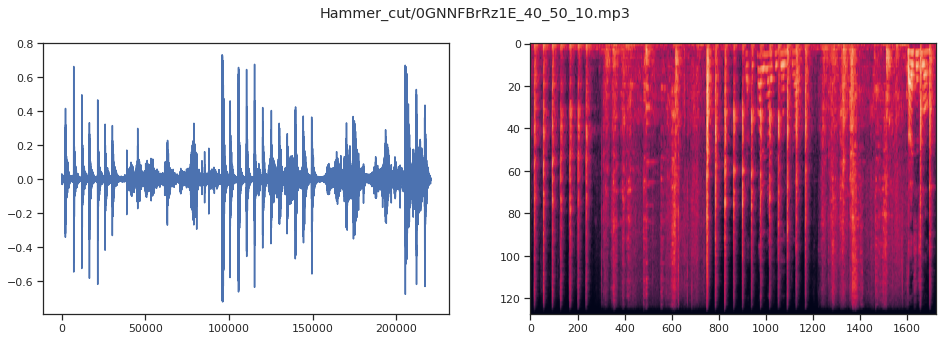

In [27]:
def plot_audio(mp3_path: str) -> None:
    """ 
    En utilisant matplotlib et create_mel_spectrogram() écrivez une fonction qui prend un mp3_path et trace
    à la fois la forme d'onde (graphique linéaire des amplitudes) et le spectrogramme mel côte à côte en tant que subplots.

    Utilisez le mp3_path comme titre principal unique pour tout le graphique
    """
    fig = plt.figure(figsize=(16, 5))
    ax_graph = fig.add_subplot(121)
    ax_mel = fig.add_subplot(122)

    fig.suptitle(mp3_path)
    y, sr = librosa.load(path = mp3_path)
    ax_graph.plot(y)
    mel_log = create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")
    ax_mel.imshow(mel_log, aspect='auto')
    plt.show()
    

plot_audio("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")